### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning



In [ ]:
df_data.shape

(962, 16)

In [ ]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [ ]:
df_data.dtypes

,0
year,int64
category,object
prize,object
motivation,object
prize_share,object
laureate_type,object
full_name,object
birth_date,object
birth_city,object
birth_country,object


In [ ]:
df_data.describe()

,year
count,962.00
mean,"1,971.82"
std,33.81
min,"1,901.00"
25%,"1,948.00"
50%,"1,977.00"
75%,"2,001.00"
max,"2,020.00"


In [ ]:
df_data.year.min()

1901

In [ ]:
df_data.year.max()

2020

### Check for Duplicates

In [ ]:
df_data.duplicated().value_counts()

,count
False,962


In [ ]:
df_data.duplicated().sum()

np.int64(0)

### Check for NaN Values

In [ ]:
df_data.isna().value_counts()

year   category  prize  motivation  prize_share  laureate_type  full_name  birth_date  birth_city  birth_country  birth_country_current  sex    organization_name  organization_city  organization_country  ISO  
False  False     False  False       False        False          False      False       False       False          False                  False  False              False              False                 False    698
                                                                                                                                                True               True               True                  False    153
                        True        False        False          False      False       False       False          False                  False  True               True               True                  False     68
                                                                           True        True        True           True                   True   True               True               True                  True      16
                        False       False        False          False      True        True        True           True                   True   True               True               True                  True      12
                                                                           False       False       False          False                  False  True               False              False                 False      4
                        True        False        False          False      False       False       False          False                  False  False              False              False                 False      4
                        False       False        False          False      False       False       False          False                  False  False              True               True                  False      3
                                                                                       True        False          False                  False  True               True               True                  False      2
                                                                                       False       False          False                  False  False              True               False                 False      1
                                                                                       True        False          False                  False  False              False              False                 False      1
Name: count, dtype: int64

In [ ]:
df_data.isna().sum()

,0
year,0
category,0
prize,0
motivation,88
prize_share,0
laureate_type,0
full_name,0
birth_date,28
birth_city,31
birth_country,28


In [ ]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [ ]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions


* Converting the `birth_date` column to Pandas `Datetime` objects
* Adding a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [ ]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denominator

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [ ]:
percent_gender = df_data.sex.value_counts(normalize=True)
fig = px.pie(labels = percent_gender.index,
             values = percent_gender.values,
             names=percent_gender.index,
             title = 'Percentage of Prizes Won by Gender',
             hole=0.5)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Findig=ng**:
* The names of the first 3 female Nobel laureates?
* What did they win the prize for?
* What's in `birth_country` and checking if they were part of any organisation.

In [ ]:
df_data[df_data.sex == "Female"].sort_values('year',ascending = True).head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

Checking if some people got a Nobel Prize more than once. If so, displaying their info.

In [ ]:
repeated_winners = df_data.full_name.value_counts()
repeated_winners[repeated_winners > 1]

,count
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Frederick Sanger,2
John Bardeen,2
Linus Carl Pauling,2
Office of the United Nations High Commissioner for Refugees (UNHCR),2
"Marie Curie, née Sklodowska",2


In [ ]:
repeat_laureates = df_data[df_data['full_name'].isin(repeated_winners[repeated_winners > 1].index)]
display(repeat_laureates[['full_name', 'category', 'laureate_type', 'year']].sort_values(by=[ 'year']))

,full_name,category,laureate_type,year
18,"Marie Curie, née Sklodowska",Physics,Individual,1903
62,"Marie Curie, née Sklodowska",Chemistry,Individual,1911
89,Comité international de la Croix Rouge (Intern...,Peace,Organization,1917
215,Comité international de la Croix Rouge (Intern...,Peace,Organization,1944
278,Linus Carl Pauling,Chemistry,Individual,1954
283,Office of the United Nations High Commissioner...,Peace,Organization,1954
297,John Bardeen,Physics,Individual,1956
306,Frederick Sanger,Chemistry,Individual,1958
340,Linus Carl Pauling,Peace,Individual,1962
348,Comité international de la Croix Rouge (Intern...,Peace,Organization,1963


# Number of Prizes per Category

**Finding**:
* How many categories are prizes awarded for?
* Creating a plotly bar chart with the number of prizes awarded by category.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [ ]:
no_of_categories = df_data.category.nunique()
no_of_categories

6

In [ ]:
prize_per_category = df_data.category.value_counts()
chart = px.bar(
          x = prize_per_category.index,
          y = prize_per_category.values,
          title='Number of Prizes Awarded by Category',
          color = prize_per_category.index,
          color_continuous_scale="Aggrnyl" ,
          labels={'x': 'Category', 'y': 'Number of Prizes'})

chart.update_layout(xaxis_title='Nobel Prize Category',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
chart.show()

**Finding**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [ ]:
df_data[df_data.category == 'Economics'].sort_values('year').head(3)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


# Male and Female Winners by Category



In [ ]:
cat_men_women = df_data.groupby(['category', 'sex'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women.head()

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90


In [ ]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')

v_bar_split.update_layout(xaxis_title='Nobel Prize Category',
                          yaxis_title='Number of Prizes')
v_bar_split.show()

# Number of Prizes Awarded Over Time

**Finding**:
* If more prizes are awarded recently than when the prize was first created.
* Counting the number of prizes awarded every year.
* Creating a 5 year rolling average of the number of prizes.
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020.




In [ ]:
no_of_prizes_per_year = df_data.groupby('year', as_index=False).agg({'prize': pd.Series.count})
no_of_prizes_per_year.head()

,year,prize
0,1901,6
1,1902,7
2,1903,7
3,1904,6
4,1905,5


In [ ]:
rolling_avg = no_of_prizes_per_year.prize.rolling(window=5, center=True).mean()
rolling_avg

,prize
0,NaN
1,NaN
2,6.20
3,6.20
4,6.00
...,...
112,12.00
113,12.20
114,12.40
115,NaN


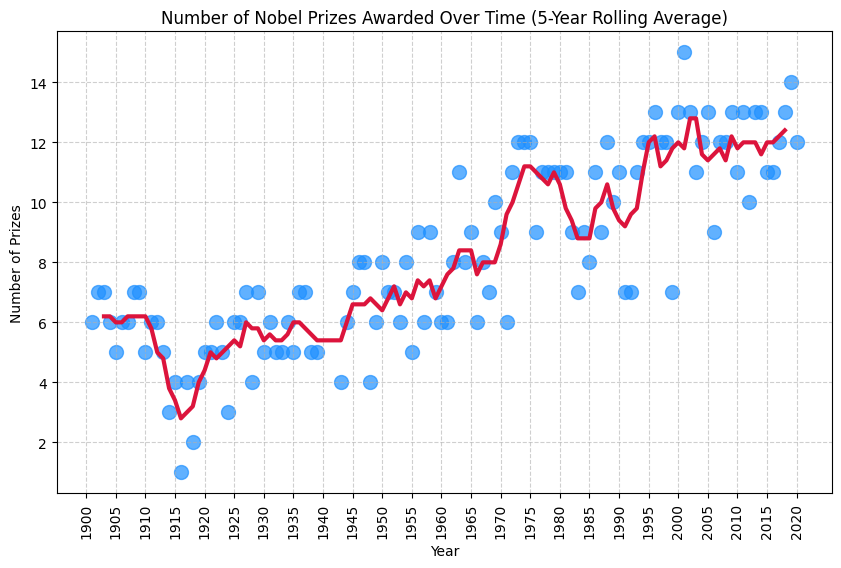

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=no_of_prizes_per_year.year,
            y=no_of_prizes_per_year.prize,
            c='dodgerblue',
            alpha=0.7,
            s=100)

plt.plot(no_of_prizes_per_year.year,
        rolling_avg.values,
        c='crimson',
        linewidth=3)

plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Number of Nobel Prizes Awarded Over Time (5-Year Rolling Average)')
plt.xticks(np.arange(1900, 2021, 5), rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Are More Prizes Shared Than Before?

**Finding**: If more prizes are shared than before.

* Calculating the average prize share of the winners on a year by year basis.
* Calculating the 5 year rolling average of the percentage share.
* Plotting the rolling average of the prize share on this chart.
* Inverting the secondary y-axis to make the relationship even more clear.

In [ ]:
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

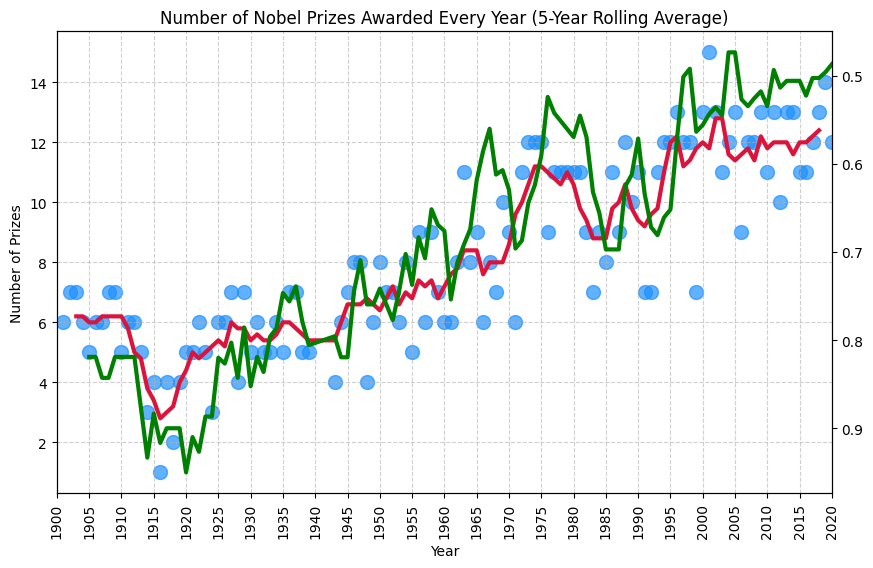

In [ ]:
plt.figure(figsize=(10, 6))
plt.xticks(np.arange(1900, 2021, 5), rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Number of Prizes')

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)

ax1.scatter(x=no_of_prizes_per_year.year,
            y=no_of_prizes_per_year.prize,
            c='dodgerblue',
            alpha=0.7,
            s=100)

ax1.plot(no_of_prizes_per_year.year,
        rolling_avg.values,
        c='crimson',
        linewidth=3)

ax2.plot(no_of_prizes_per_year.year,
        share_moving_average.values,
        c='green',
        linewidth=3
         )
ax2.invert_yaxis()


plt.title('Number of Nobel Prizes Awarded Every Year (5-Year Rolling Average)')
plt.show()

# The Countries with the Most Nobel Prizes

In [ ]:
#Creating a New Dataframe
top_countries = df_data.groupby(['birth_country_current'],
                                as_index=False).agg({'prize': pd.Series.count})
top_countries.sort_values('prize', ascending=True, inplace=True)
top_20_countries = top_countries[-20:]

In [ ]:
top_20_countries

,birth_country_current,prize
33,India,9
31,Hungary,9
65,South Africa,9
2,Australia,10
20,Denmark,12
13,China,12
54,Norway,12
3,Austria,18
51,Netherlands,18
39,Italy,19


In [ ]:
h_bar = px.bar(x=top_20_countries.prize,
               y=top_20_countries.birth_country_current,
               orientation='h',
               color=top_20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')

h_bar.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Using a Choropleth Map to Show the Number of Prizes Won by Country




In [ ]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'],
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
63,Slovakia,SVK,1
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [ ]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize',
                          hover_name='birth_country_current',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes?




In [ ]:
cat_country = df_data.groupby(['birth_country_current', 'category'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)

In [ ]:
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
190,Turkey,Chemistry,1
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


In [ ]:
#Merging Cat_Country with Top20 Countries
merged_df = pd.merge(cat_country, top_20_countries, on='birth_country_current')
# changing column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)

In [ ]:
merged_df

,birth_country_current,category,cat_prize,total_prize
61,South Africa,Medicine,3,9
55,Hungary,Chemistry,3,9
58,South Africa,Peace,3,9
81,Hungary,Medicine,2,9
105,Hungary,Economics,1,9
...,...,...,...,...
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
9,United States of America,Peace,19,281
0,United States of America,Medicine,78,281


In [ ]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')

cat_cntry_bar.update_layout(xaxis_title='Number of Prizes',
                            yaxis_title='Country')
cat_cntry_bar.show()


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [ ]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [ ]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

In [ ]:
l_chart = px.line(cumulative_prizes,
                  x='year',
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')

l_chart.show()

# What are the Top Research Organisations?

**Finding**:

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [ ]:
org_counts = df_data.organization_name.value_counts().head(20).sort_values(ascending=True)

org_bar_chart = px.bar(
    x=org_counts.values,
    y=org_counts.index,
    orientation='h',
    color=org_counts.values,
    color_continuous_scale='Plasma',
    title='Top 20 Organisations by Number of Nobel Laureates'
)

org_bar_chart.update_layout(
    xaxis_title='Number of Nobel Laureates',
    yaxis_title='Organisation Name',
    coloraxis_showscale=False
)
org_bar_chart.show()

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Finding**:
* Creating another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [ ]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
170,1933,Physics,The Nobel Prize in Physics 1933,"""for the discovery of new productive forms of ...",1/2,Individual,Erwin Schrödinger,1887-08-12,Vienna,Austria,Austria,Male,Berlin University,Berlin,Germany,AUT,0.50


In [ ]:
top_20_org_cities = df_data.organization_city.value_counts().head(20).sort_values(ascending=True)

bar_chart = px.bar(
    x=top_20_org_cities.values,
    y=top_20_org_cities.index,
    title= "Top 20 Organisation Cities",
    color = top_20_org_cities.values,
    color_continuous_scale='Plasma',
    orientation='h'
)

bar_chart.update_layout(
    xaxis_title='Number of Nobel Laureates',
    yaxis_title='Organisation City',
    coloraxis_showscale=False
)
bar_chart.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Finding**:
* Creating a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [ ]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
712,2000,Medicine,The Nobel Prize in Physiology or Medicine 2000,"""for their discoveries concerning signal trans...",1/3,Individual,Arvid Carlsson,1923-01-25,Uppsala,Sweden,Sweden,Male,Göteborg University,Gothenburg,Sweden,SWE,0.33


In [ ]:
birth_city_counts = df_data.birth_city.value_counts().head(20).sort_values(ascending=True)

city_bar = px.bar(
    x=birth_city_counts.values,
    y=birth_city_counts.index,
    title = "Top 20 Birth Cities",
    color = birth_city_counts.values,
    color_continuous_scale='Plasma',
    orientation='h'
)

city_bar.update_layout(
    xaxis_title='Number of Nobel Laureates',
    yaxis_title='Birth City',
    coloraxis_showscale=False
)
city_bar.show()

In [ ]:
us_laureates = df_data[df_data.birth_country_current == 'United States of America']
ny_laureates = us_laureates[us_laureates.birth_city == 'New York, NY'].shape[0]
other_us_laureates = us_laureates.shape[0] - ny_laureates

percentage_data = pd.Series({
    'New York, NY': ny_laureates,
    'Other US Cities': other_us_laureates
})

fig = px.pie(names=percentage_data.index,
             values=percentage_data.values,
             title='Percentage of US Prizes Won by Laureates Born in New York, USA',
             hole=0.5)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Creating a DataFrame that groups the number of prizes by organisation.
* Plotting the Data into a Sunburst Chart




In [ ]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
366,1965,Peace,The Nobel Peace Prize 1965,NaN,1/1,Organization,United Nations Children's Fund (UNICEF),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [ ]:
prize_won_by_org = df_data.groupby(['organization_country',
                                    'organization_city',
                                    'organization_name'],
                                   as_index= False).agg({'prize': pd.Series.count})
prize_won_by_org = prize_won_by_org.sort_values('prize', ascending=False)

In [ ]:
sunburst_chart = px.sunburst(prize_won_by_org,
                             path=['organization_country', 'organization_city', 'organization_name'],
                             values='prize',
                             title='Number of Prizes Won by Organisation')
sunburst_chart.update_layout(coloraxis_showscale=False)
sunburst_chart.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Finding**: The age of the laureate in the year of the ceremony and adding this in a column called `winning_age` to the `df_data` DataFrame.



In [76]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
486,1978,Medicine,The Nobel Prize in Physiology or Medicine 1978,"""for the discovery of restriction enzymes and ...",1/3,Individual,Daniel Nathans,1928-10-30,"Wilmington, DE",United States of America,United States of America,Male,Johns Hopkins University,"Baltimore, MD",United States of America,USA,0.33


In [85]:
birth_years = df_data.birth_date.dt.year

In [78]:
df_data['winning_age'] = df_data.year - birth_years

### Who were the oldest and youngest winners?

**Finding**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Using Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experimenting with the number of `bins` to see how the visualisation changes.

In [79]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


In [95]:
df_data.winning_age.describe()


,winning_age
count,934.00
mean,59.95
std,12.62
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


In [89]:
#Average Age
winning_age_mean = df_data.winning_age.mean().round()
print(f'The Average Age is {winning_age_mean}')

The Average Age is 60.0


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculating the descriptive statistics for the age at the time of the award.
* Then visualising the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).


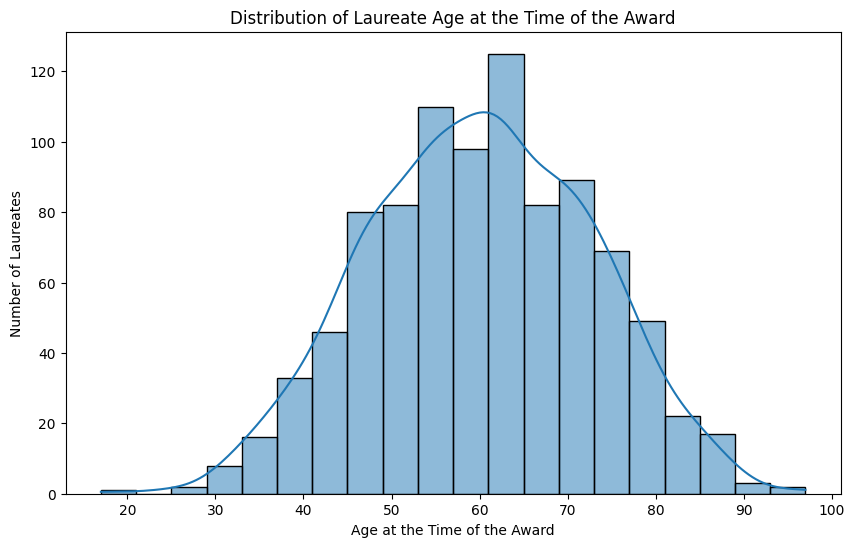

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_data, x='winning_age', bins=20, kde=True)
plt.title('Distribution of Laureate Age at the Time of the Award')
plt.xlabel('Age at the Time of the Award')
plt.ylabel('Number of Laureates')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Finding**

* Using Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Setting the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


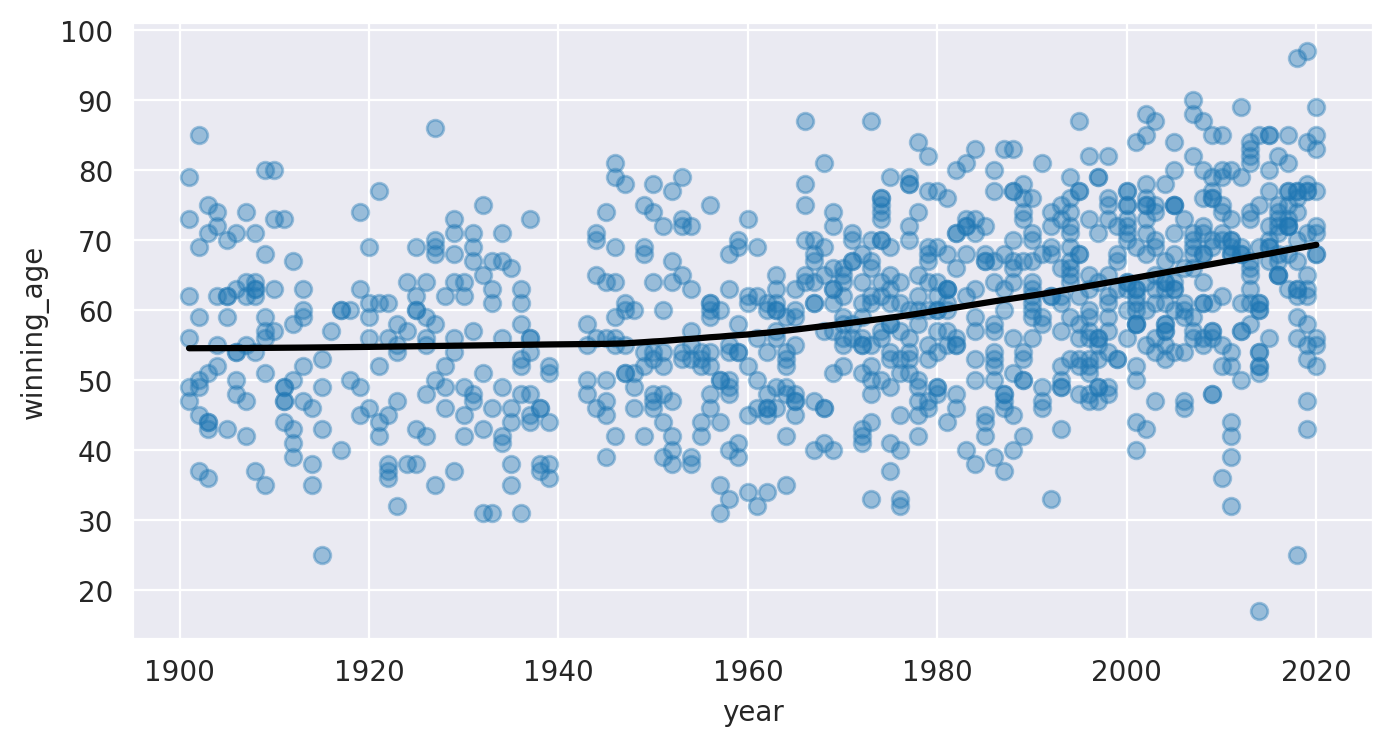

In [106]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Using Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

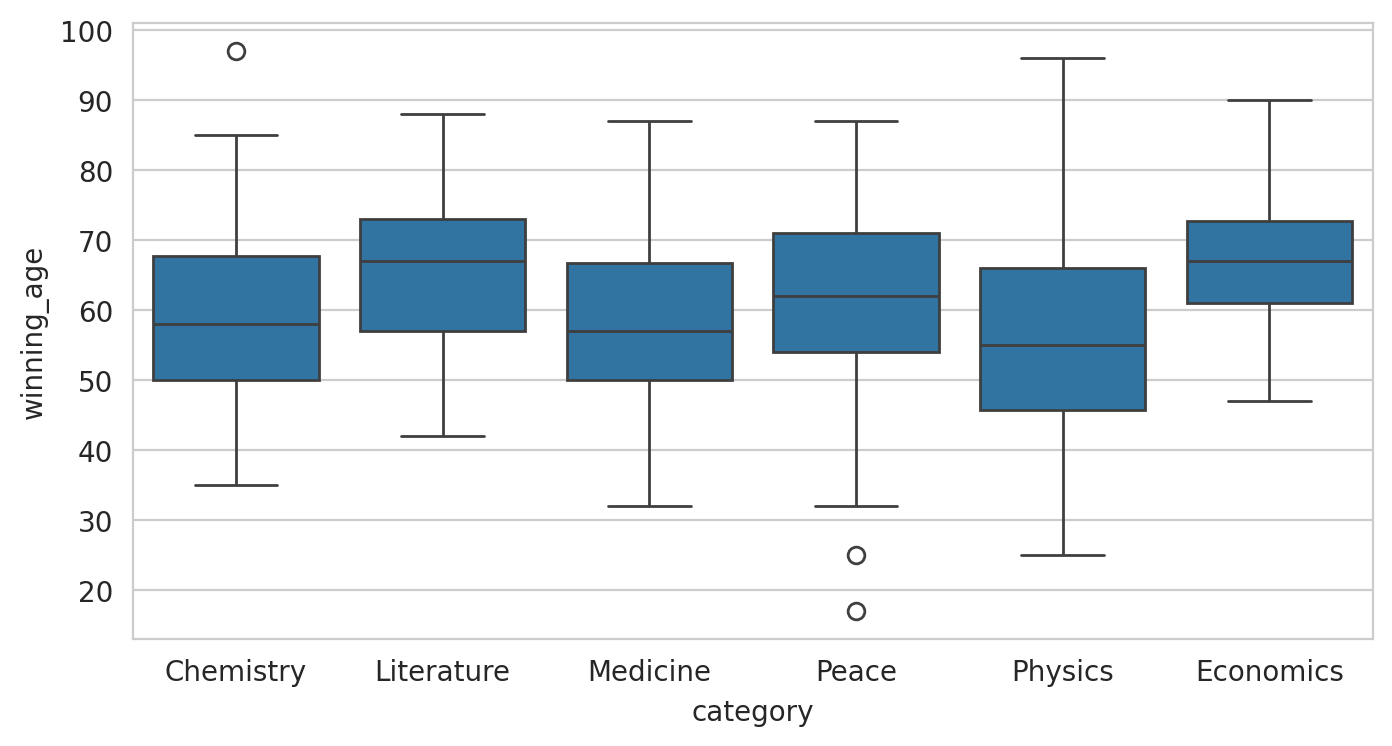

In [107]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')

plt.show()

**Finding**
* Using Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again setting `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


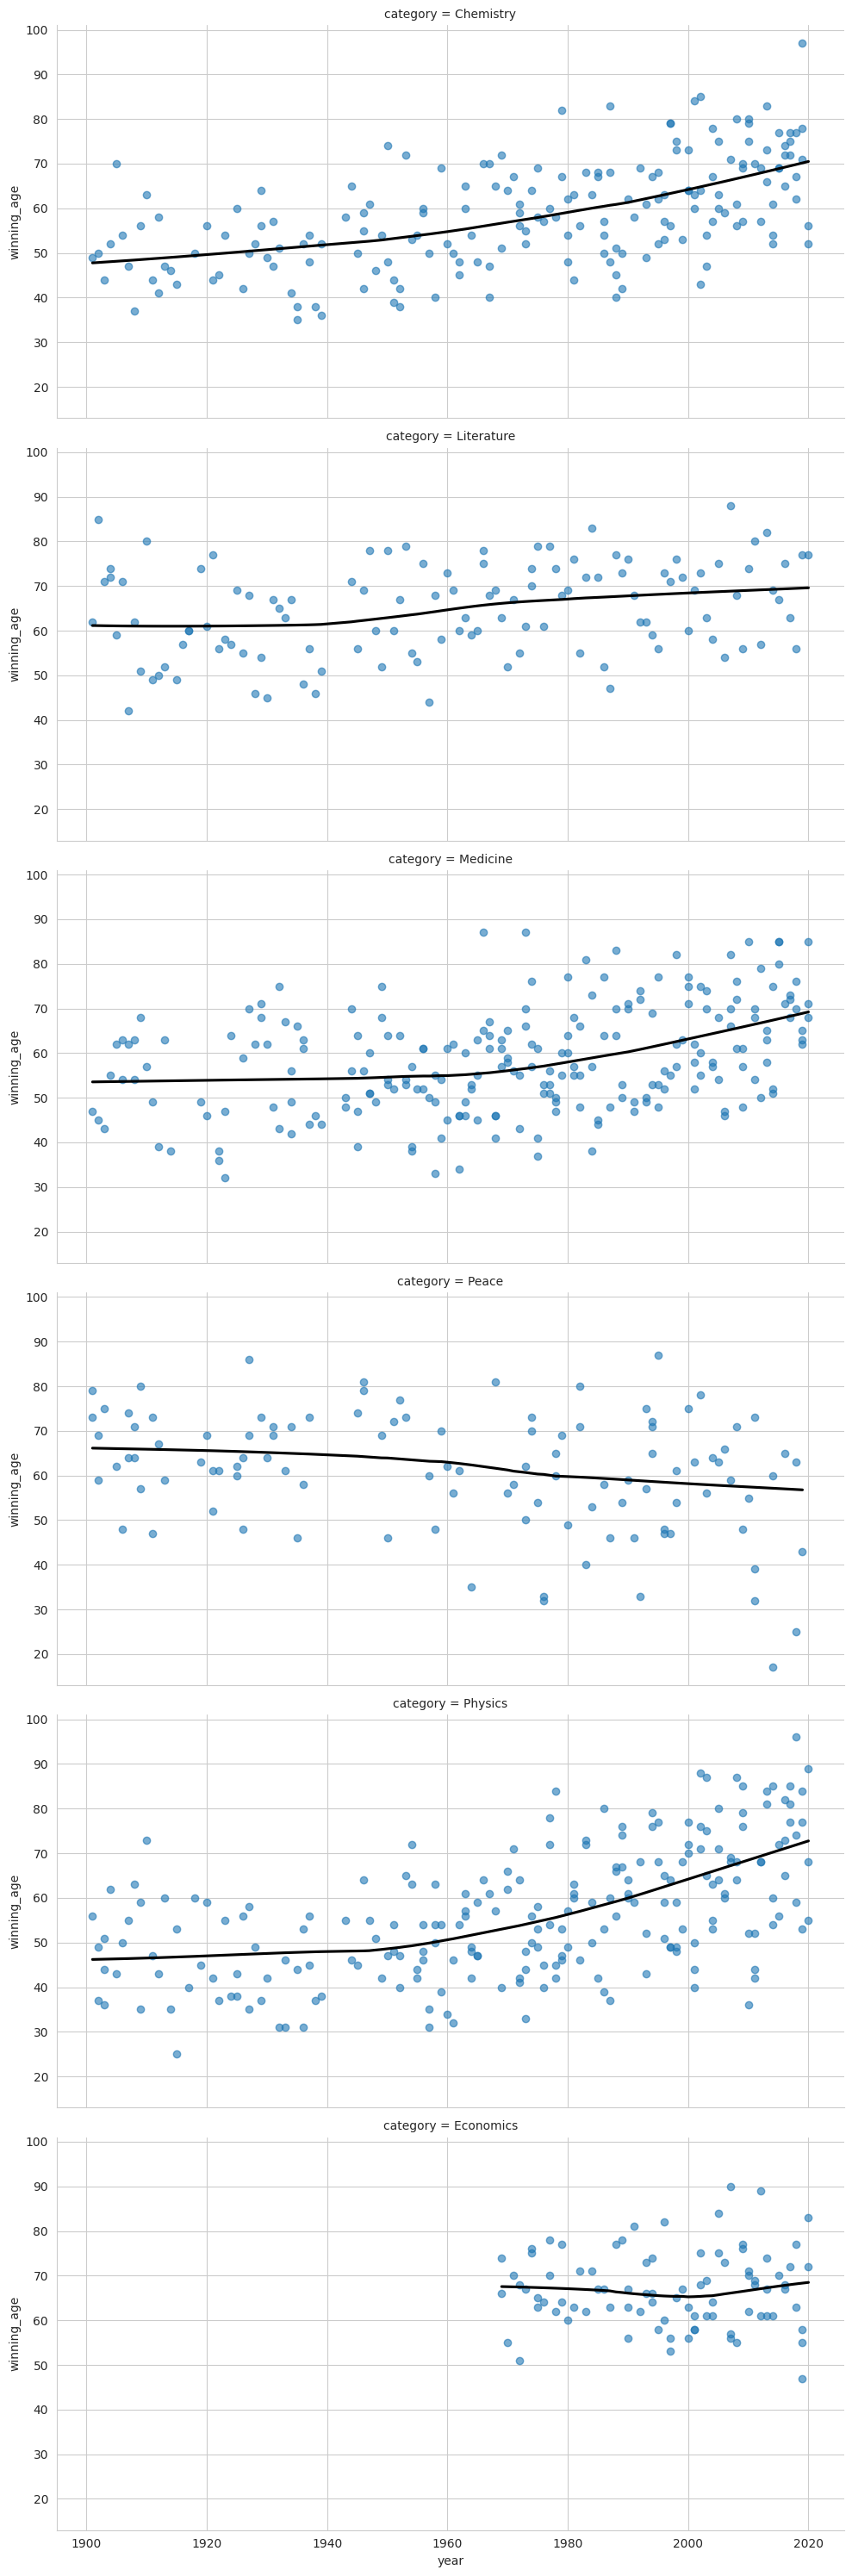

In [108]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               row = 'category',
               lowess=True,
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)

plt.show()

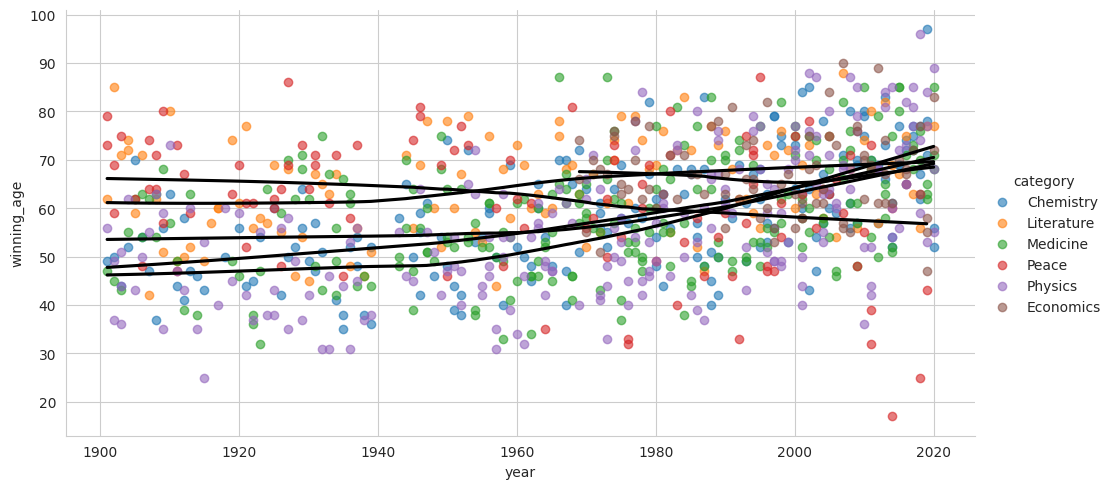

In [109]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue = 'category',
               lowess=True,
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)

plt.show()